Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.2759 - val_loss: 0.1868
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1683 - val_loss: 0.1510
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1419 - val_loss: 0.1320
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1271 - val_loss: 0.1203
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1176 - val_loss: 0.1126
Epoch 6/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1110 - val_loss: 0.1070
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1061 - val_loss: 0.1029
Epoch 8/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0997 - val_loss: 0.0973
Epoch 10/10
313/313 [==============================] - 1s 1ms/step


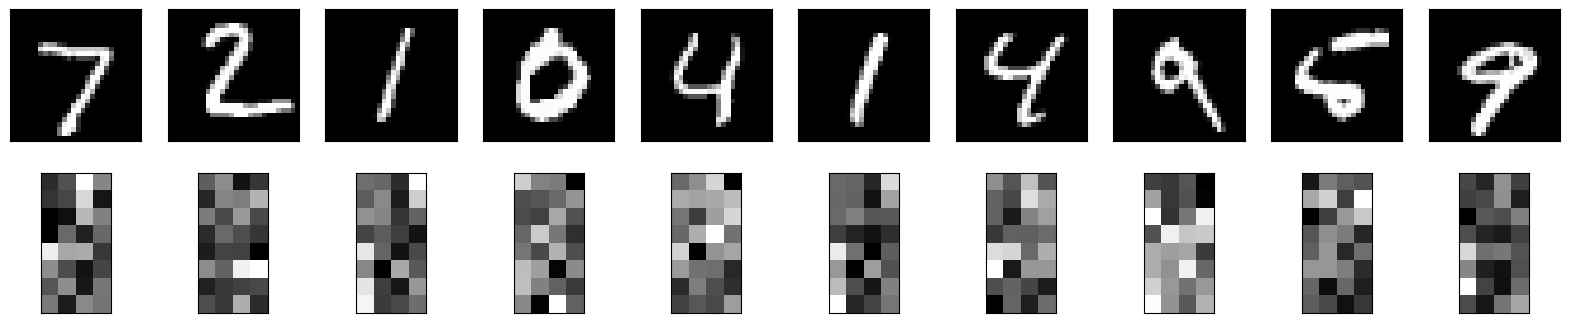

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Charger le jeu de données MNIST
(x_train, _), (x_test, _) = mnist.load_data()

# Normaliser les pixels entre 0 et 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplatir les images pour les utiliser dans un autoencodeur entièrement connecté
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Taille de la couche d'encodage
encoding_dim = 32

# Entrée
input_img = Input(shape=(784,))

# Encodeur
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Décodeur
decoded = Dense(784, activation='sigmoid')(encoded)

# Modèle d'autoencodeur
autoencoder = Model(input_img, decoded)

# Compilez le modèle
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Entraînez l'autoencodeur sur le jeu d'apprentissage MNIST
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encoder pour obtenir des représentations compressées
encoder = Model(input_img, encoded)

# Encoder les images de test
encoded_imgs = encoder.predict(x_test)

# Fonction pour afficher des images avant et après l'encodage / décodage
def plot_results(x_test, encoded_imgs):
    n = 10  # Nombre d'images à afficher
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Afficher l'image d'origine
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Afficher l'image encodée / décodée
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(encoded_imgs[i].reshape(8, 4))  # Réduire la dimension pour l'affichage
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

# Afficher les résultats
plot_results(x_test, encoded_imgs)


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score

# Charger le jeu de données MNIST
(x_train, _), (_, _) = mnist.load_data()

# Normaliser les pixels entre 0 et 1
x_train = x_train.astype('float32') / 255.0

# Aplatir les images
x_train_flat = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))

# Créer un jeu de données d'anomalies/nouveautés
# Ici, j'utilise des images aléatoires, mais vous pouvez les remplacer par votre propre dataset
random_images = np.random.rand(10000, 28, 28)
anomalies = random_images.reshape((len(random_images), np.prod(random_images.shape[1:])))

# Concaténer le jeu de données MNIST avec le jeu d'anomalies
x_combined = np.concatenate([x_train_flat, anomalies])

# Créer les étiquettes correspondantes (1 pour MNIST, -1 pour anomalies)
y_combined = np.concatenate([np.ones(len(x_train_flat)), -np.ones(len(anomalies))])

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(x_combined, y_combined, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entraîner le modèle One-Class SVM
clf = OneClassSVM(nu=0.1)
clf.fit(X_train)

# Prédiction sur le jeu de test
y_pred = clf.predict(X_test)

# Étiquettes réelles du jeu de test
y_true = np.ones_like(y_test)
y_true[y_test == -1] = -1

# Évaluer la précision sur le jeu de test
accuracy_test = accuracy_score(y_true, y_pred)
print(f"Accuracy on test set: {accuracy_test}")


Accuracy on test set: 0.9078571428571428



# Charger le jeu de données MNIST

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

# Charger le jeu de données MNIST
(x_train, _), (_, _) = mnist.load_data()

x_train.shape

(60000, 28, 28)

# Normaliser les pixels entre 0 et 1

In [25]:
# Normaliser les pixels entre 0 et 1
x_train = x_train.astype('float32') / 255.0

# Diviser le jeu de données en ensembles d'entraînement et de test
X_train, X_test, _, _ = train_test_split(x_train, x_train, test_size=0.2, random_state=42)

## Créer un jeu de données d'anomalies/nouveautés

In [19]:


# Ici, j'utilise des images aléatoires, mais vous pouvez les remplacer par votre propre dataset
random_images = np.random.rand(10000, 28, 28)
# anomalies = random_images.reshape((len(random_images), np.prod(random_images.shape[1:])))

anomalies = random_images.astype('float32') / 255.0
anomalies.shape

(10000, 28, 28)

### Concaténer le jeu de données MNIST avec le jeu d'anomalies

In [26]:

# Concaténer le jeu de données MNIST avec le jeu d'anomalies
x_combined = np.concatenate([X_test, anomalies])
x_combined.shape

(22000, 28, 28)

### Aplatir les images train et test et les normaliser

In [23]:
# Aplatir les images et les normaliser
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = x_combined.reshape((len(x_combined), 28, 28, 1))
X_train = X_train / 255.0
X_test = X_test / 255.0


In [27]:
X_train.shape,X_test.shape

((48000, 28, 28), (12000, 28, 28))

# Créer un autoencodeur convolutionnel

In [28]:

# Créer un autoencodeur convolutionnel
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


## Entraîner l'autoencodeur sur le jeu d'entraînement (sans anomalies)

In [29]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test, X_test))

# Encoder de l'autoencodeur (utilisé comme détecteur d'anomalies)
encoder = Model(input_img, encoded)

# Obtenir les représentations encodées des images d'entraînement
X_train_encoded = encoder.predict(X_train)

# Aplatir les représentations encodées
X_train_encoded_flat = X_train_encoded.reshape((len(X_train_encoded), np.prod(X_train_encoded.shape[1:])))

# Entraîner le modèle One-Class SVM sur les représentations encodées
clf = OneClassSVM(nu=0.1)
clf.fit(X_train_encoded_flat)


Epoch 1/10
375/375 [==============================] - 32s 82ms/step - loss: 0.2357 - val_loss: 0.1545
Epoch 2/10
375/375 [==============================] - 33s 88ms/step - loss: 0.1421 - val_loss: 0.1333
Epoch 3/10
375/375 [==============================] - 33s 87ms/step - loss: 0.1287 - val_loss: 0.1249
Epoch 4/10
375/375 [==============================] - 32s 86ms/step - loss: 0.1221 - val_loss: 0.1198
Epoch 5/10
375/375 [==============================] - 31s 84ms/step - loss: 0.1182 - val_loss: 0.1166
Epoch 6/10
375/375 [==============================] - 32s 87ms/step - loss: 0.1153 - val_loss: 0.1144
Epoch 7/10
375/375 [==============================] - 32s 84ms/step - loss: 0.1131 - val_loss: 0.1121
Epoch 8/10
375/375 [==============================] - 33s 89ms/step - loss: 0.1113 - val_loss: 0.1104
Epoch 9/10
375/375 [==============================] - 33s 88ms/step - loss: 0.1096 - val_loss: 0.1094
Epoch 10/10
1500/1500 [==============================] - 6s 4ms/step


OneClassSVM(nu=0.1)

# Prédiction sur le jeu de test

In [30]:

# Prédiction sur le jeu de test
X_test_encoded = encoder.predict(X_test)
X_test_encoded_flat = X_test_encoded.reshape((len(X_test_encoded), np.prod(X_test_encoded.shape[1:])))
y_pred = clf.predict(X_test_encoded_flat)

# Étiquettes réelles du jeu de test
y_true = np.ones_like(y_pred)

# Évaluer la précision sur le jeu de test
accuracy_test = accuracy_score(y_true, y_pred)
print(f"Accuracy on test set: {accuracy_test}")


375/375 [==============================] - 1s 4ms/step
Accuracy on test set: 0.9006666666666666
